In [1]:
#importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

## Data Collection and Preprocessing

In [2]:
#Reading csv file into pandas dataframe
data = pd.read_csv("Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Summary of dataset
print(data.shape)
print(data.info())
#Count of null values in each column
print(data.isnull().sum())

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

In [4]:
#Dropping redundant columns such as Customer ID
data.drop('customerID',axis=1,inplace=True)
#Display all object types and describe them
data.astype('object').describe().T

,count,unique,top,freq
gender,7043,2,Male,3555
SeniorCitizen,7043,2,0,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
tenure,7043,73,1,613
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088


In [5]:
#Converting Total Charges from Object to Numeric
pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').convert_dtypes()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
#Dropping NA values received from TotalCharges
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


## Exploratory Data Analysis

In [8]:
#Extracting Numerical Features
num_features = [feature for feature in data.columns if data[feature].dtype != 'O']
print('No. of numerical features: ',len(num_features))
data[num_features].head()

No. of numerical features:  4


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.5
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [9]:
#Extracting Categorical Features
cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']
print('No. of categorical features: ',len(cat_features))
data[cat_features].head()

No. of categorical features:  16


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [10]:
#Dividing Numerical Features into Discrete and Continuous
discrete = [feature for feature in num_features if len(data[feature].unique()) <= 10]
continuous = [feature for feature in num_features if len(data[feature].unique()) > 10]

print('No. of discrete features: ',len(discrete))
print('No. of continuous features: ',len(continuous))

No. of discrete features:  1
No. of continuous features:  3


<Axes: >

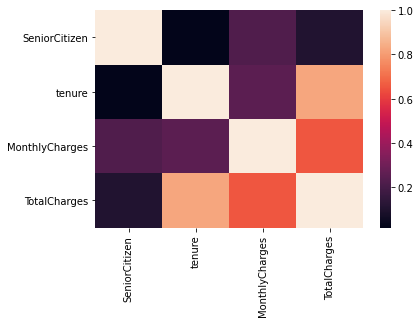

In [11]:
#Correlation between all numerical values using heatmap
sns.heatmap(data[num_features].corr())

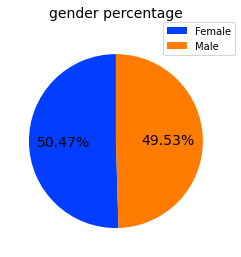

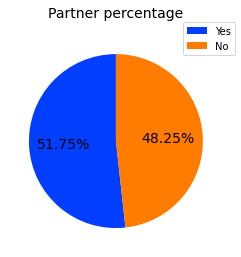

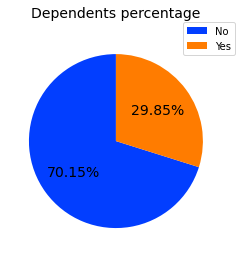

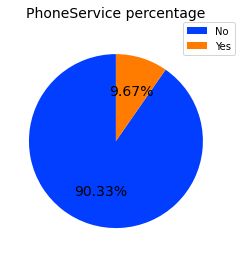

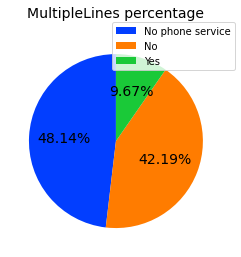

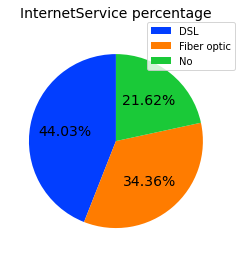

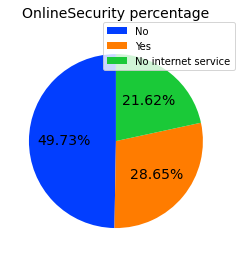

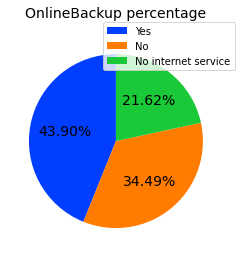

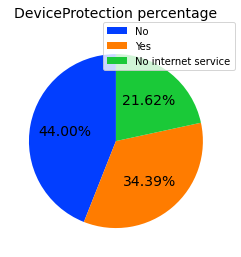

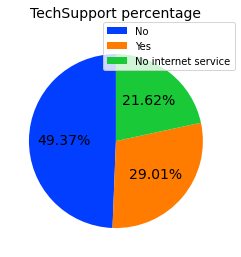

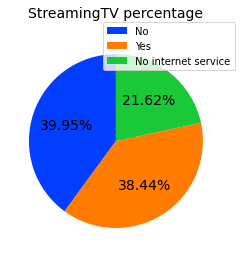

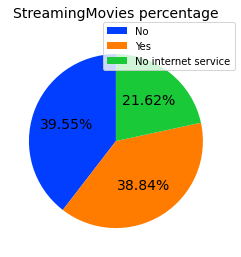

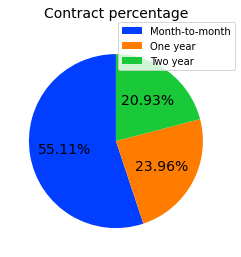

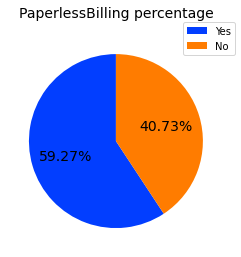

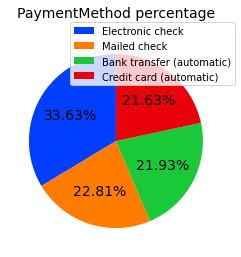

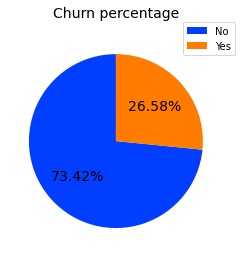

In [12]:
col_count = len(cat_features)
i=1

for x in cat_features:
  data_count = data[x].value_counts()
  #Pie Plots to understand categorical types and splits in each category
  palette_color = sns.color_palette('bright')
  patches = plt.pie(data_count, autopct="%.2f%%", textprops={"size": 14,}, startangle=90, colors = palette_color)
  center_circle = plt.Circle((0, 0), 0.3, fc='white')
  plt.title("{} percentage".format(x), size=14, pad=15)
  plt.legend(data[x].unique(),loc="upper right", borderaxespad = -1)

  i=i+1
  plt.show()

In [13]:
lab = LabelEncoder()

#Convert Categorical Values into Numerical Codes
data[cat_features] = data[cat_features].apply(lab.fit_transform)

<Axes: title={'center': 'Correlation Plot'}>

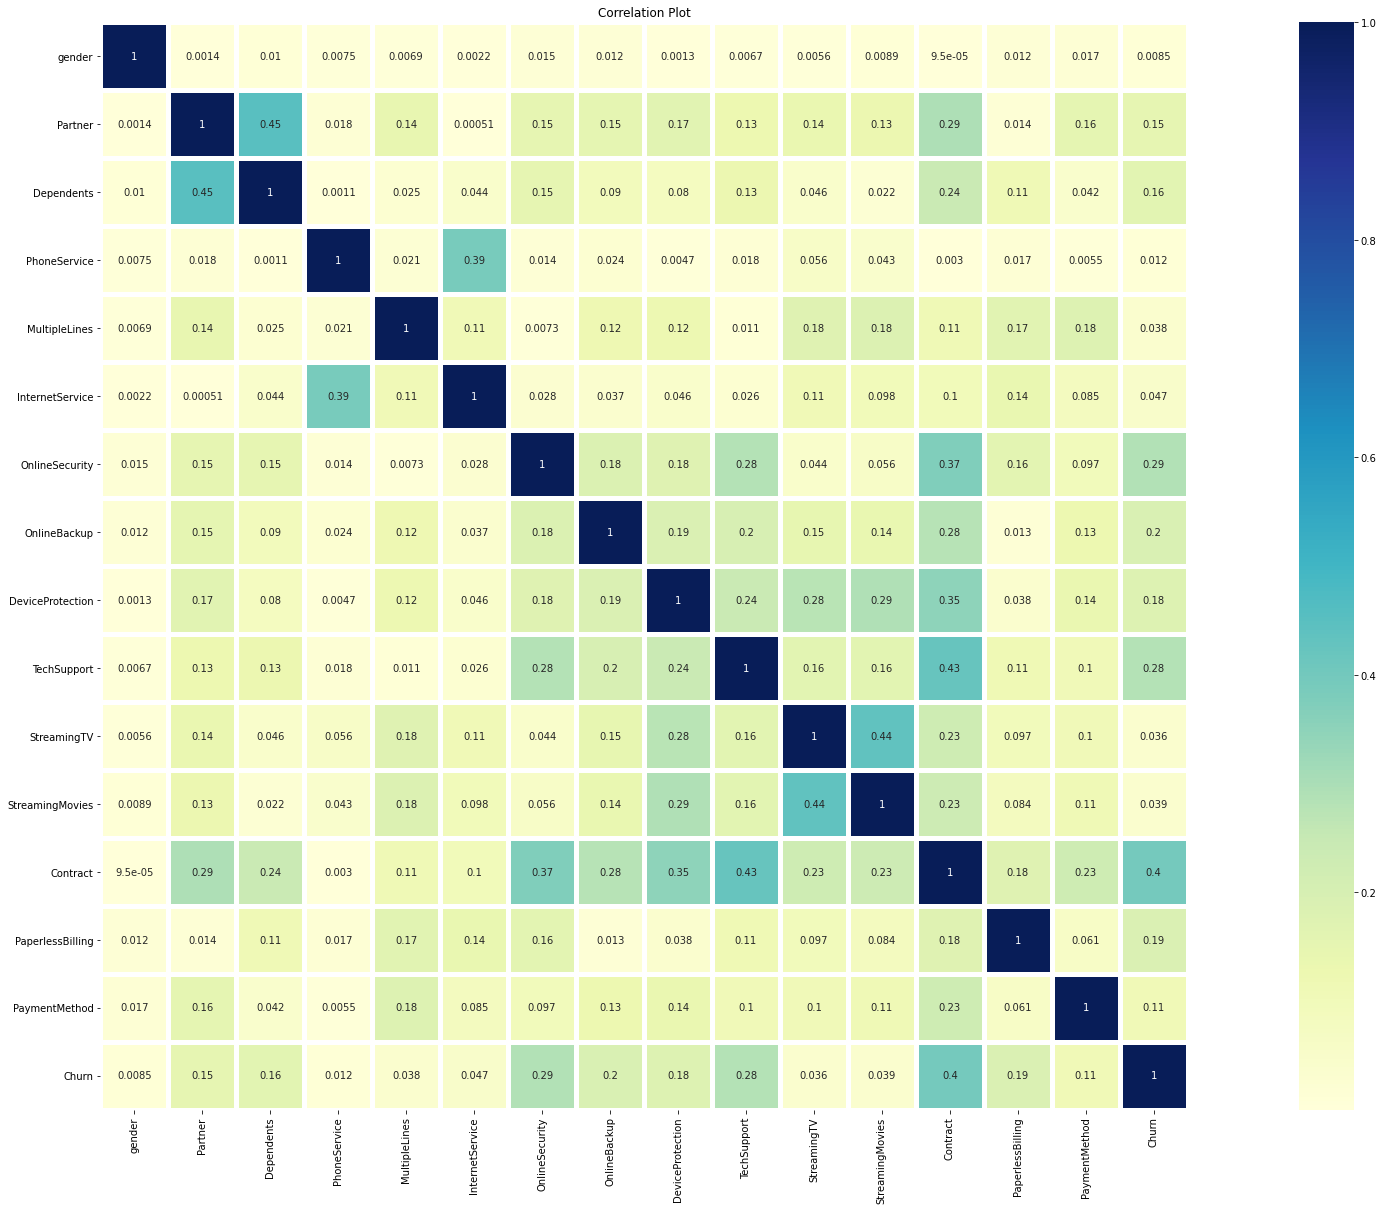

In [14]:
#Heatmap to show correlation among categorical data

plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(np.abs(data[cat_features].corr()),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

## Feature Engineering

In [15]:
#Division of original data into X (Input) and y (Output)

X = data.loc[:,data.columns!='Churn']
y = data['Churn']

In [16]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [17]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [18]:
#Split data in Train:Test = 0.8:0.2 Ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

## Model Building

In [19]:
#Specify Parameters for GridSearchCV

params = {
    'max_depth': [2, 4, 6, 8],
  'learning_rate': [0.1, 0.2, 0.3],
  'n_estimators': [100, 150, 200, 250],
  'num_class': [10,20,30]
}

In [20]:
#Use GridSearchCV for fine-tuning

model = XGBClassifier(objective="multi:softmax", tree_method='hist', device="cuda")
clf = GridSearchCV(estimator=model,
                             param_grid=params,
                             scoring='accuracy',
                             n_jobs=4,
                             verbose=1)
clf.fit(X_train, y_train)

best_param = clf.best_params_

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[19:08:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "device" } are not used.



In [21]:
#Get the best paramters
best_param

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'num_class': 20}

In [22]:
#Use the best paramters
tuned_model = XGBClassifier(learning_rate = 0.1,
                           max_depth = 2,
                           n_estimators = 100,
                           num_class = 20,
                           objective="multi:softmax",
                           tree_method='hist',
                           device="cuda")
tuned_model.fit(X_train,y_train)

y_pred = tuned_model.predict(X_test)

[19:09:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "device" } are not used.



## Model Evaluation

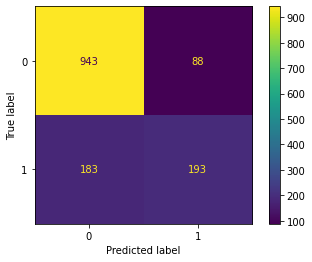

In [23]:
#Confusion matrix to visualize output
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [24]:
#Print Classification Metrics
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("F1-Score: ",f1_score(y_test,y_pred))
print("ROC Curve: ",roc_auc_score(y_test,y_pred))

Accuracy:  0.8073916133617626
Precision:  0.6868327402135231
Recall:  0.5132978723404256
F1-Score:  0.5875190258751903
ROC Curve:  0.7139719235610954
